# Исследование доходности ставок в РПЛ

**Цель исследования** - Оценка потенциального выигрыша в ставках на матчи РПЛ, а также возможные пути повышения эффективности выбора ставок.
  
**Основные гипотезы**
1. Большинство матчей заканчивается с 2-мя или более забитыми мячами, следовательно ставки "Тотал больше 1.5" и "Тотал больше 2.5" выгодны.
  
**Ход исследования** - Данные о поведении пользователей получены из файла с расширением .csv. 
Имеется документация, однако могут встречаться пропуски или значения, искажающие данные. Поэтому перед проверкой гипотез требуется провести обзор данных.

In [1]:
import pandas as pd
import seaborn as sb

In [2]:
df = pd.read_excel ('rpl_2021.xlsx') 
print(df.columns)

Index(['round', 'date', 'time', 'host_team', 'away_team', 'host_score',
       'away_score'],
      dtype='object')


В таблице результаты 240 матчей РПЛ сезона 2021/22

Названия столбцов: 
  
round - номер тура  
date - дата матча  
time - время начала матча  
host_team - название команды хозяев  
away_team - название команды гостей  
host_score - счет команды хозяев  
away_score - счет команды гостей  

In [3]:
coeff_1_5 = [1.32, 1.2, 1.24, 1.24, 1.31, 1.26, 1.27, 1.24, 1.23, 1.26, 1.2, 1.2, 1.21, 1.2, 1.22, 1.26, 1.4, 1.17, 1.23, 1.24, 1.21, 1.27, 1.44, 1.25, 1.2, 1.21, 1.3, 1.25, 1.2]
coeff_2_5 = [1.92, 1.85, 1.71, 1.88, 1.64, 1.63, 1.68, 1.7, 1.73, 1.86, 2.26, 1.58, 1.76, 1.82, 1.7, 1.87, 2.13, 1.81, 1.65, 1.69, 1.99, 1.82, 1.65]

coeff_1_5_avg = sum(coeff_1_5)/len(coeff_1_5)
coeff_2_5_avg = sum(coeff_2_5)/len(coeff_2_5)

print(coeff_1_5_avg)
print(coeff_2_5_avg)

1.249
1.797


Списки коэффициентов на ТБ 1.5 и ТБ 2.5

План:

Общий
1. Количество голов в каждом матче
2. Средние коэффициенты
3. Сколько ставок сыграет
4. Суммарный выигрыш по каждой ставке
5. Суммарный доход по каждой ставке
6. Процент дохода от суммарных ставок
  
Выход в "0"
1. Необходиный процент победных ставок для "0"
2. Необходимый коэффициент для "0"
  
Распределение по командам
1. Самые забивающие команды
2. п.п. 3-5 общего расчета для этих команд
3. Самые пропускающие команды
4. п.п. 3-5 общего расчета для этих команд

## 1. Общие расчеты

### 1.1. Количество голов в каждом матче

In [5]:
df['total_score'] = df['host_score'] + df['away_score']

df

,round,date,time,host_team,away_team,host_score,away_score,total_score
0,1,2021-07-23,20:00,Ростов,Динамо М,0,2,2
1,1,2021-07-24,17:30,Химки,Зенит,1,3,4
2,1,2021-07-24,20:00,Локомотив М,Арсенал,3,1,4
3,1,2021-07-24,20:00,Рубин,Спартак М,1,0,1
4,1,2021-07-25,17:30,Урал,Краснодар,0,3,3
...,...,...,...,...,...,...,...,...
235,30,2022-05-21,17:00,Рубин,Уфа,1,2,3
236,30,2022-05-21,17:00,Крылья Советов,Локомотив М,0,1,1
237,30,2022-05-21,17:00,Динамо М,Сочи,1,5,6
238,30,2022-05-21,17:00,Краснодар,Ахмат,1,1,2


In [6]:
def bet_win (score, bet):
    if score > bet:
        return 1
    else:
        return 0
    
new_columns = ['tb_1_5_win', 'tb_2_5_win']

df['tb_1_5_win'] = df['total_score'].apply(bet_win, bet = 1.5)
df['tb_2_5_win'] = df['total_score'].apply(bet_win, bet = 2.5)

In [7]:
total_bets = df['total_score'].count()

tb_1_5_wins = df['tb_1_5_win'].sum()
tb_2_5_wins = df['tb_2_5_win'].sum()

In [8]:
tb_1_5_profit = tb_1_5_wins * coeff_1_5_avg
tb_2_5_profit = tb_2_5_wins * coeff_2_5_avg

<AxesSubplot:>

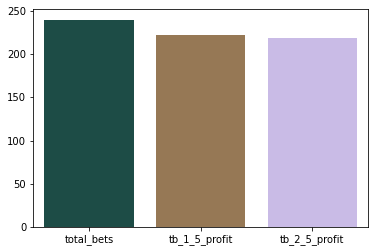

In [34]:
chart_data = pd.Series({'total_bets':total_bets, 'tb_1_5_profit':tb_1_5_profit, 'tb_2_5_profit':tb_2_5_profit})
chart_data

sb.barplot(x=chart_data.index,
           y=chart_data,
           palette = 'cubehelix')

In [49]:
tb_1_5_total_profit = tb_1_5_profit - total_bets
tb_2_5_total_profit = tb_2_5_profit - total_bets

tb_1_5_total_profit_percentage = tb_1_5_total_profit / total_bets
tb_2_5_total_profit_percentage = tb_2_5_total_profit / total_bets

print(f'''Если бы вы поставили ставку "ТБ > 1.5" по 1 руб. на все матчи РПЛ сезона 2021/22:
Средний коэффициент ставок был бы равен {coeff_1_5_avg:.4}.
При этом ваш доход составил бы {tb_1_5_total_profit:.4}руб. или {tb_1_5_total_profit_percentage:.2%}!''')
print()
print(f'''Если бы вы поставили ставку "ТБ > 2.5" по 1 руб. со средним коэффициентом {coeff_2_5_avg:.4}:
Ваш доход составил бы {tb_2_5_total_profit:.4}руб. или {tb_2_5_total_profit_percentage:.2%}!''')

Если бы вы поставили ставку "ТБ > 1.5" по 1 руб. на все матчи РПЛ сезона 2021/22:
Средний коэффициент ставок был бы равен 1.249.
При этом ваш доход составил бы -17.68руб. или -7.37%!

Если бы вы поставили ставку "ТБ > 2.5" по 1 руб. со средним коэффициентом 1.797:
Ваш доход составил бы -20.77руб. или -8.65%!
